<a href="https://colab.research.google.com/github/jacosta387/cd_202202_jose_acosta/blob/main/Taller_de_Funci%C3%B3n_K_de_Ripley.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **La Función K de Ripley**
La función K, propuesta por Brian D. Ripley en 1976, representa la media observada del número de puntos dentro de una distancia definida dividida por la densidad de puntos en el área de estudio.

La forma general de la función K está dada por la ecuación:

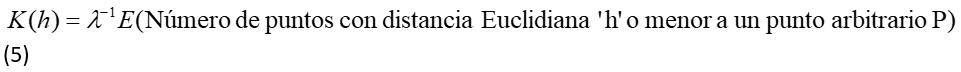

Donde λ es la densidad de puntos en el área. El valor de la función K para un fenómeno aleatoriamente distribuido es igual a πh^2.

Para estimar el valor de la función K se parte del valor estimado de E, denominado operador de expectación, que para espacios planos se estima mediante la ecuación:

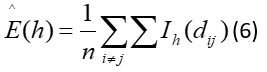

Donde h es la distancia máxima entre los puntos a ser tomada en consideración, n es el número total de puntos, dij es la distancia euclidiana entre dos puntos i y j, Ih() es una función de peso con valor uno (1) cuando la distancia entre los puntos es menor o igual a h y valor cero (0) cuando esta distancia es superior a h y R es el área del espacio estudiado. La densidad de puntos λ se puede estimar como:

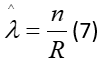

Al remplazar las funciones (6) y (7) sobre la función (5) se obtiene el estimador de la función K para espacios planos dado por la ecuación:

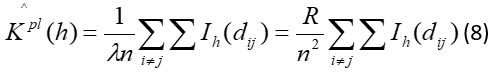

La siguiente figura muestra las distancias dij menores o iguales a h para dos puntos arbitrarios dentro del área de estudio.

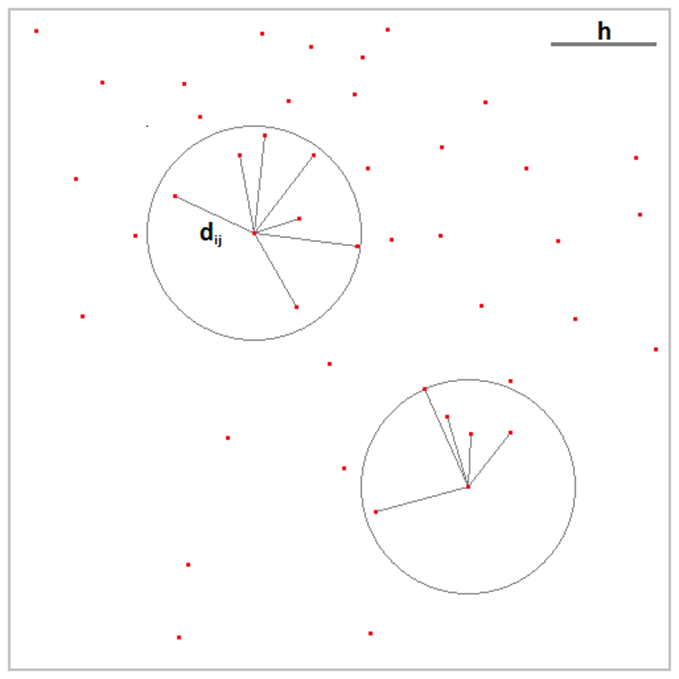

La función K puede ser utilizada para determinar si una serie de puntos ubicados sobre un espacio tienden a formar grupos o por el contrario se distribuye de forma aleatoria; una forma de poner a prueba estas afirmaciones es por medio de simulaciones de Monte Carlo. Para esto se genera una gran cantidad de conjuntos aleatorios de puntos sobre el mismo espacio (por ejemplo 1.000 conjuntos), la función K se aplica con diferentes valores de h (distancia máxima entre puntos a tenerse en cuenta) sobre cada uno de los conjuntos de datos aleatorios generados y sobre el conjunto original de puntos. Con los resultados de la función K sobre los conjuntos aleatorios para cada valor de h se definen intervalos de confianza, por ejemplo del 95% (entre el valor que ocupa el percentil 2,5 y el valor que ocupa el percentil 97,5), si el valor de la función K para el conjunto de datos original es superior al intervalo de confianza definido se puede concluir que existe tendencia estadísticamente significativa a formar agrupaciones y por lo tanto la distribución de los datos sobre el espacio no es aleatoria.

In [ ]:
!pip install pyproj
!pip install cython
!pip install cartopy
!apt-get -qq install python-cartopy python3-cartopy
!pip uninstall -y shapely    # cartopy and shapely aren't friends (early 2020)
!pip install shapely --no-binary shapely

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 6.3 MB 8.5 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 10.8 MB 8.0 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... error
     |████████████████████████████████| 10.8 MB 48.5 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... error
     |████████████████████████████████| 10.8 MB 35.5 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... error
     |████████████████████████████████| 10.8 MB 41.1 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... error
     |████████████████████████████████| 12.1 MB 42.4 MB

In [ ]:
# Importar librerias necesarias para el proyecto.
import math
import seaborn as sb
import urllib.request

%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import cm

import cartopy
import cartopy.crs as ccrs                   # for projections
import cartopy.feature as cfeature           # for features
import cartopy.io.shapereader as shapereader
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
from cartopy.feature.nightshade import Nightshade

import warnings
warnings.filterwarnings('ignore')


In [ ]:
import pandas as pd #Handling and analysis of data structures
import pyproj #Proyection and conversion of geometries between coordinate reference system

In [ ]:
!apt-get install nvidia-cuda-toolkit
!pip3 install numba

import os # Crea Carpetas, Renombra Archivos y Trabaja con Directorios
os.environ['NUMBAPRO_LIBDEVICE'] = "/usr/lib/nvidia-cuda-toolkit/libdevice"
os.environ['NUMBAPRO_NVVM'] = "/usr/lib/x86_64-linux-gnu/libnvvm.so"

from numba import cuda
import numpy as np
import time

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
The following additional packages will be installed:
  cpp-6 fonts-dejavu-core fonts-dejavu-extra g++-6 gcc-6 gcc-6-base
  libaccinj64-9.1 libasan3 libatk-wrapper-java libatk-wrapper-java-jni
  libcublas9.1 libcudart9.1 libcufft9.1 libcufftw9.1 libcuinj64-9.1
  libcurand9.1 libcusolver9.1 libcusparse9.1 libgail-common libgail18
  libgcc-6-dev libgtk2.0-0 libgtk2.0-bin libgtk2.0-common libnppc9.1
  libnppial9.1 libnppicc9.1 libnppicom9.1 libnppidei9.1 libnppif9.1
  libnppig9.1 libnppim9.1 libnppist9.1 libnppisu9.1 libnppitc9.1 libnpps9.1
  libnvblas9.1 libnvgraph9.1 libnvrtc9.1 libnvtoolsext1 libnvvm3
  libstdc++-6-dev libthrust-dev libvdpau-dev libxxf86dga1 nvidia-cuda-dev
  nvidia-cuda-doc nvidia-cuda-gdb nvidia-profiler nvidia-visual-profiler
  openjdk-8-jr

In [ ]:
#Importar origen de datos.
ruta = 'https://foscalinternacional.com/datasets/eventos_dengue_2020.csv'
df = pd.read_csv(ruta)
df

,ID,fec_not,semana,año,edad_,uni_med_,sexo_,cod_pais_o,cod_dpto_o,cod_mun_o,...,hipotension,hepatomegalia,hemorragia_mucosa,hipotermia,caida_plaquetas,acum_liquido,aum_hematocrito,conducta,latitud,longitud
0,1,17/01/2020,1,2020,25,1,F,170,68,276,...,2,2,2,2,2,2,2,1. Ambulatorio,7.076011,-73.102501
1,2,10/01/2020,1,2020,24,1,M,170,68,276,...,2,2,2,2,2,2,2,1. Ambulatorio,7.079495,-73.105400
2,3,12/01/2020,1,2020,58,1,M,170,68,276,...,2,2,2,2,2,2,2,1. Ambulatorio,7.090290,-73.091003
3,4,12/01/2020,1,2020,29,1,F,170,68,276,...,2,2,2,2,2,2,2,1. Ambulatorio,7.067435,-73.090958
4,5,10/01/2020,1,2020,56,1,F,170,68,276,...,2,2,2,2,1,2,2,2. Hospitalizacion piso,7.066905,-73.104980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1257,1258,7/03/2020,9,2020,36,1,F,170,68,276,...,2,2,1,2,2,2,2,1. Ambulatorio,7.072610,-73.099487
1258,1259,13/03/2020,9,2020,42,1,M,170,68,276,...,2,2,2,2,1,2,1,2. Hospitalizacion piso,7.065252,-73.103607
1259,1260,8/03/2020,9,2020,2,1,M,170,68,276,...,2,2,2,2,2,2,2,1. Ambulatorio,7.091391,-73.103264
1260,1261,11/03/2020,9,2020,12,1,F,170,68,276,...,2,2,2,2,2,2,2,1. Ambulatorio,7.061083,-73.097000


In [ ]:
#Creación de la proyección
P = pyproj.Proj(proj='utm', zone=18, ellps='WGS84', preserve_units=True)

In [ ]:
#Se convertirán las coordenadas geográficas a UTM
df['x'], df['y'] = P(df['longitud'], df['latitud'])
#df

# Contar la cantidad de puntos con distancia igual o mayor de 100 mts.




In [ ]:
'''#Función K de Ripley - Calcular E(Number the points) (Puntos cercanos 100 mts)
#Hallar landa
from decimal import DivisionByZero
from math import sqrt
def NearPoints(x_list, y_list, proximity):
  contador =0
  near_points = []
  if len(x_list) != len(y_list):
    raise ValueError(f'X list and Y list value does not match')
  for i in range(len(x_list)):
    near_points.append([])
    x0 = x_list[i]
    y0 = y_list[i]
    printList=[] #Validate
    for j in range(len(x_list)):
      if i != j:
        x1 = x_list[j]
        y1 = y_list[j]
        x = abs(x1 - x0)
        y = abs(y1 - y0)
        distance = sqrt(x**2 + y**2)
        if distance <= proximity:
          near_points[i].append((j, distance))
          contador+=1
  return contador'''

"#Función K de Ripley - Calcular E(Number the points) (Puntos cercanos 100 mts)\n#Hallar landa\nfrom decimal import DivisionByZero\nfrom math import sqrt\ndef NearPoints(x_list, y_list, proximity):\n  contador =0\n  near_points = []\n  if len(x_list) != len(y_list):\n    raise ValueError(f'X list and Y list value does not match')\n  for i in range(len(x_list)):\n    near_points.append([])\n    x0 = x_list[i]\n    y0 = y_list[i]\n    printList=[] #Validate\n    for j in range(len(x_list)):\n      if i != j:\n        x1 = x_list[j]\n        y1 = y_list[j]\n        x = abs(x1 - x0)\n        y = abs(y1 - y0)\n        distance = sqrt(x**2 + y**2)\n        if distance <= proximity:\n          near_points[i].append((j, distance))\n          contador+=1\n  return contador"

In [ ]:
print(df['x'].mean())
print(df['y'].mean())

710379.5826398408
782763.2617568913


In [ ]:
#Función K de Ripley
h = 100

In [ ]:
##Puntos cercanos
#near_points = NearPoints(df['x'], df['y'], 100)
#near_points


In [ ]:
# Obtain the remote shapefile files
import urllib.request

url = 'https://foscal.net/cartografia/'

file_list = ["68276_urbano.cpg", "68276_urbano.dbf", "68276_urbano.prj", "68276_urbano.qmd", "68276_urbano.shp","68276_urbano.shx"]

for file in file_list:
    urllib.request.urlretrieve(url+file, file)

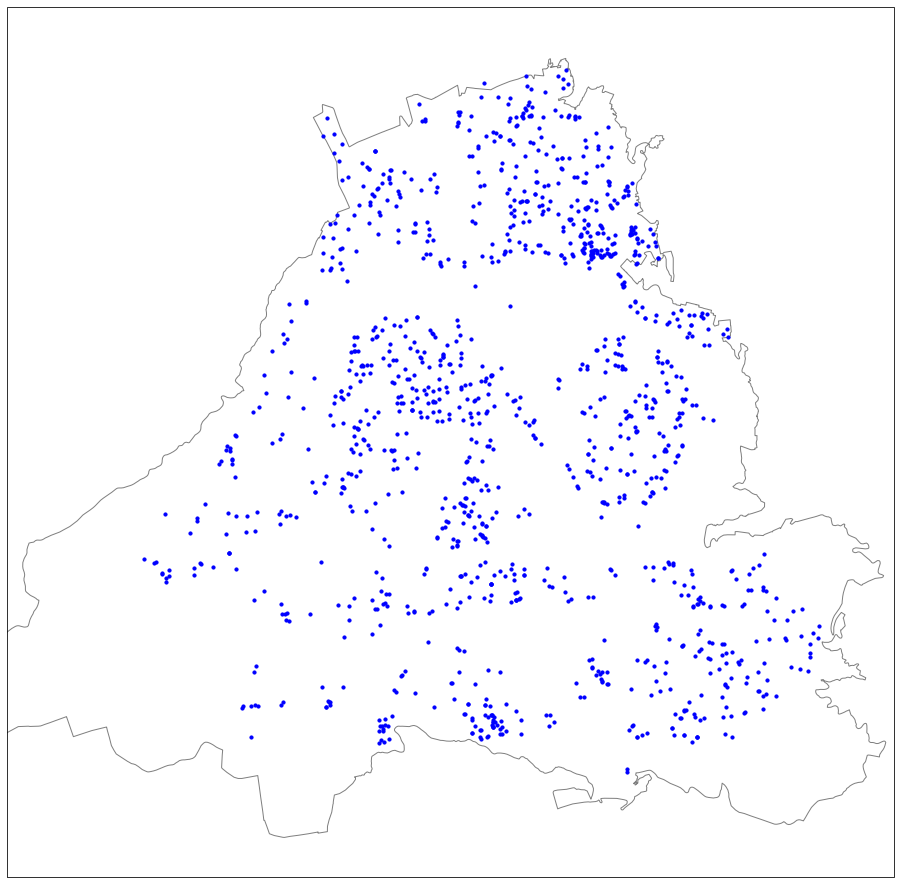

In [ ]:
subplot_kw = dict(projection=ccrs.PlateCarree())

fig, ax = plt.subplots(figsize=(16, 16), subplot_kw=subplot_kw)

# Mapa de Floridablanca
lower_lon = -73.125 #min(df['longitud'])
upper_lon = -73.073 #max(df['longitud'])
lower_lat = 7.051 #min(df['latitud'])
upper_lat = 7.102 #max(df['latitud'])

ax.set_extent([lower_lon, upper_lon, lower_lat, upper_lat])

reader = shapereader.Reader('68276_urbano')

for manzana in reader.geometries():
    ax.add_geometries([manzana], ccrs.PlateCarree(), facecolor='white', edgecolor='gray')

ax.scatter(df['longitud'], df['latitud'], zorder=10, c='b', s=10)

ax.add_line
plt.show()

In [ ]:
from pyproj import Geod #realiza cálculos geodésicos directos e inversos
from shapely import wkt #Crear polígono basado en coordenadas 

polyMap = ""
for x in reader.geometries():
  polyMap = x

geod = Geod(ellps="WGS84")
poly = polyMap
points = np.array(poly)
print(points)
  
area = abs(geod.geometry_area_perimeter(poly)[0])
print(area)

POLYGON ((-73.07407285697673 7.069474056682395, -73.07406866523667 7.069476668313655, -73.07399633006656 7.069527112186506, -73.07394969302385 7.069546149035602, -73.07387259684282 7.069533775263551, -73.07384309188512 7.069512836348395, -73.07381739375768 7.069463343958205, -73.07380978009724 7.069370068973569, -73.07383928595425 7.069264421116202, -73.07391447557256 7.069024571027171, -73.07393256093889 7.068901791084841, -73.07391828330208 7.068836117193086, -73.07387735695443 7.068783768556102, -73.073835479124 7.068757118945939, -73.07371174590031 7.068719999428481, -73.07360990487319 7.068662891579208, -73.07362480574017 7.068626213628932, -73.07363233486433 7.068609649016139, -73.07364265188681 7.068586952825683, -73.07370073190322 7.068552104995717, -73.07371403557426 7.068544121713899, -73.07384609562075 7.06852984587573, -73.07385377043511 7.068528872809281, -73.07385384507887 7.068528863816084, -73.07409950928491 7.068497722991594, -73.07416574795087 7.068469656049842, -73.0

In [ ]:
import math
#Encontrar distancia
def distancia(x1, y1, x2, y2):
  return math.sqrt((x2-x1)**2 + (y2-y1)**2)

In [ ]:
#Definir función de puntos cercanos

def NearPoints (pointList, h): #Lista de puntos y distancia h
  counter = 0 #Instanciar contador
  pointOneIndex = 0 #Indice de Puntos
  for pointOne in pointList: #Recorrer el punto uno, en una lista de puntos.
    if(pointOneIndex +1 < len(pointList)):
      for pointTwo in pointList[pointOneIndex + 1:len(pointList)]: #Recorrer el punto dos, en una lista de puntos.
        if (distancia(pointOne[0],pointOne[1],pointTwo[0],pointTwo[1]) <= h):
          counter += 1
    pointOneIndex += 1
  return counter #mostrar valor del contador
def valuefK(points, area, h, ): #a: area / h: distancia / points: puntos
  return (area/(len(points)**2)) * NearPoints(points,h)

In [ ]:
# Generar puntos aleatorios
import random #Libreria de puntos aleatorios.
from shapely.geometry import Point
import matplotlib.path as mpltPath
import numpy as np
import multiprocessing

def temp(number, otherNum): #Crear función temporal.
  print(otherNum)
  print(number)

def GeneratorPoints(pointNumber, polygon):
  pointList = [] #lista de puntos
  for a in range(pointNumber): 
    x = 0 #instanciar x
    y = 0 #instanciar y
    while (polygon.contains(Point(x, y)) == False): #(path.contains_points([[0,0]])[0] == False):
      x = random.uniform(lower_lon, upper_lon)
      y = random.uniform(lower_lat, upper_lat)
    pointList.append(list(P(x, y)))
  return pointList

In [ ]:
#Obtener el K real en la posicion 0 usar los dos percentiles y convertirlos a tabla.
# h:0, kreal: 1 , p 2.5 y p 97.5
# Percentiles 97.5 y p 2.5

In [ ]:
#Crear función completa.


def FunctionkRipley(originalPointList, ranList, h):
  #print(ranList)
  result = []
  valueoriginalK = valuefK(originalPointList, area, h)
  result.append(valueoriginalK)

  totalPoints = len(originalPointList)
  for randSet in ranList:
    result.append(valuefK(randSet, area, h))
  result.sort()
  return [h, valueoriginalK, np.percentile(result, 2.5), np.percentile(result, 97.5)]

In [ ]:
# Definir función iterativa del valor K.
import time

def ValueiterateK(originalPointList):
  result = []
  randList = []
  totalPoints = len(originalPointList)
  for i in range(999): #Rango de cantidad de datos
    print("\rDatos Aleatorios = " + str(i + 1), end='', flush=True)
    
   
    randList.append(GeneratorPoints(totalPoints,poly))
  print()
  for i in range(5,100,5):
    start_time = time.time()
    print(str(i) + " - " + str(time.time()-start_time))
    result.append(FunctionkRipley(originalPointList, randList, i))
  return result

In [ ]:
x_points = df['x']
y_points = df['y']
pointList = []
for index in range(len(x_points)):
  pointList.append([x_points[index], y_points[index]])

In [ ]:
finalData = ValueiterateK(pointList)

Datos Aleatorios = 999
5 - 4.5299530029296875e-06
10 - 2.86102294921875e-06
15 - 3.5762786865234375e-06
20 - 2.86102294921875e-06
25 - 2.86102294921875e-06
30 - 3.0994415283203125e-06
35 - 3.0994415283203125e-06
40 - 3.814697265625e-06
45 - 3.0994415283203125e-06
50 - 3.5762786865234375e-06
55 - 3.337860107421875e-06
60 - 3.5762786865234375e-06
65 - 2.86102294921875e-06
70 - 2.6226043701171875e-06
75 - 4.5299530029296875e-06
80 - 3.337860107421875e-06
85 - 4.291534423828125e-06
90 - 3.337860107421875e-06
95 - 3.337860107421875e-06


In [ ]:
dfResult = pd.DataFrame(finalData, columns=['h', 'K Original', '2.5', '97.5'])
dfResult

,h,K Original,2.5,97.5
0,5,1036.914234,10.422592,85.518700
1,10,2127.277656,85.518700,245.866262
2,15,3110.742703,245.866262,491.732523
3,20,4361.453686,481.042686,801.737810
4,25,5590.784995,812.427647,1207.951634
5,30,6948.394353,1197.261796,1667.614645
6,35,8861.875259,1678.304482,2234.176030
7,40,10337.072829,2233.908784,2875.566278
8,45,12336.072435,2864.609195,3591.785388
9,50,14687.836678,3570.138468,4404.213036


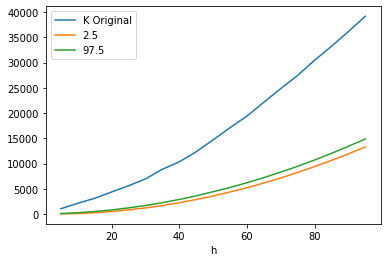

In [ ]:
dfResult.plot(x="h", y=["K Original", "2.5", "97.5"])
plt.show()

In [ ]:
#P = pyproj.Proj(proj='utm', zone=18, ellps='WGS84', preserve_units=True)
P = pyproj.Proj('epsg:3857')
#df['x'], df['y'] = P(df['longitud'], df['latitud'])
#df
x, y = P([-8138896.658564394], [782860.4134188816])
print(x)
print(y)

[inf]
[inf]
